<a href="https://colab.research.google.com/github/thad75/TP_ENSEA_ELEVE/blob/main/SIA/TP2/Image_Colorization_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP GAN : Image Colorization

Approximate Time : 2h (if lucky)

The goal of this lab is to make you understand a certain type of GAN : conditional GANs. You will train a model to predict the colors of an Black and White image.

Goal of this lab :               
* Understand GANs and cGANs
* Apply your knowledge on Adversarial Generative Learning
* Use Pytorch Lightning with PyTorch

In [ ]:
!pip install pytorch-lightning

In [ ]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
import cv2 as cv
from google.colab.patches import cv2_imshow
import pytorch_lightning as pl
imageimagefrom pytorch_lightning import LightningDataModule, LightningModule, Trainer

# Colorization

The task of colorization is :             
Given a Black and White input image, find colors of regions of the image.
More technically speaking, we will move the image from the RGB space to the La*b* space and regress two specific channels.

* What is the Lab space ? define each terms of the Lab space
* Which channel(s) do you think the model should create ?

For this lab, we will use the CIFAR10 Dataset (Again :D). 
* What modification should we make on the existing CIFAR10 dataset from torchvision ? Using skimage library, make those changes.
* Is normalization needed ?


Please take in notice that the CIFAR10_Colorization Dataset inherits from CIFAR10 dataset.



In [ ]:
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb
class CIFAR10_Colorization(CIFAR10):
  def __init__(self, directory, train= True, download = True):
    self.directory = directory
    self.train = train
    self.download_data = download
    super(CIFAR10_Colorization, self).__init__(root = self.directory, train = self.train, download = self.download_data)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    img = 

    return {'L': L, 'ab':ab ,'image': img} # L, ab



Define your train, val, test Datasets and Dataloaders. Feel free to use a LightningDataModule

In [ ]:
class CIFARDataModule(LightningDataModule):
    def __init__(self, directory, batch_size, download=True):
        self.directory = directory
        self.batch_size = batch_size
        self.download = download 

    def setup(self, stage=None):
      if stage == "fit" or stage is None:
        dataset_train = 
        self.dataset_train, _ = 

      if stage == "test" or stage is None:
        self.dataset_test = 
    
    def train_dataloader(self):
       return 

    def val_dataloader(self):
        return 

    def test_dataloader(self):
        return 



# Generative Adversarial Network

* Before beginning anything, tell me a story to help me understand how GANs should work.

In this lab, we will use a specific GAN : conditional GAN (cGAN).

<img src='https://www.researchgate.net/profile/Gerasimos-Spanakis/publication/330474693/figure/fig1/AS:956606955139072@1605084279074/GAN-conditional-GAN-CGAN-and-auxiliary-classifier-GAN-ACGAN-architectures-where-x_Q320.jpg'>

 On the contrary of a normal GAN, cGAN has a condition that will help us CONTROL how the GAN should generate images. The generator will take some "inspiration" from the Condition. For example, if you want to generate digits from the MNIST Dataset, you can add a condition to force the GAN to create a specific Digit. In this case, the condition would be the class label.

An interesting paper for you to read : https://arxiv.org/pdf/1411.1784.pdf

We are going to color images 

# A closer look into the world of GANs

*  What are the component of a GAN ?
* What is the purpose of each of them ?

# Generator

In general, the Generator is here to generate Data from input Noise. For example if we train a GAN on MNIST dataset, the generator will create digits using the noise we give it as input. 

* What type of model can recreate images ?

In this lab, we are dealing with cGANs, so we need a Condition to condition our GAN. 
* What could be the condition ? To answer that :
  * What are we trying to do ?
  * What should the Generator do ? Should it recreate some things specific ?

Using that specific model, create a Generator that takes as your condition. (Are you puzzled ?)

Hint : There are 3 parts in this lab. One of the lab recreates images. Feel free to reimport it and modify it :)


We give you some skeleton of models if needed. But if your previous model work, import it.

HINT : The following Conv2D channels work well (3 => 64 => 128 => Latent_Size)

In [ ]:
class ConvDown(nn.Module):
  def __init__(self, in_channels, out_channels):
      super(ConvDown, self).__init__()
  def forward(self,x):
      return self.model(x)

class ConvUp(nn.Module):
  def __init__(self, in_channels, out_channels):
      super(ConvUp, self).__init__()
  def forward(self,x):
      return self.model(x)

class Encoder(nn.Module):
  def __init__(self, in_channels, latent_size):
    super(Encoder, self).__init__()
  def forward(self, x):
    return self.encoder(x)

class Decoder(nn.Module):
  def __init__(self, latent_size, out_channels):
    super(Decoder, self).__init__()
  def forward(self, x):
    return self.decoder(x)

class Generator(nn.Module):
  def __init__(self, in_channels, latent_size, out_channels):
    super(Generator, self).__init__()
    self.encoder = 
    self.decoder = 

  def forward(self, x):
    _ = self.encoder(x)
    generated_image = self.decoder(_)
    return generated_image

# Discriminator

Now that the generator is able to create Data, we need someone to put down the Generator's knowledge : the Discriminator.

The Discriminator is here to force the Generator to create better and better images. While the Generator brings bad quality representation, the Discriminator will not be happy.

<img src="https://i.pinimg.com/474x/88/9d/1b/889d1b3f74b7c20c845f2a2f7db2ca8a.jpg">

* What task is the Discriminator performing ? 
* Create a Discriminator. 
* What must be the output of the model ?

* HINT :  The following Conv2D channels work well (in_channels => 3 => 32 => 64 => 128 => out_channels).
* HINT 2 : Add LeakyRelu with slope 0.2 to avoir Vanishing Gradient. Add batchNormalization

* What is Vanishing Gradient ?

In [ ]:
class Discriminator(nn.Module):
  def __init__(self, in_channels, out_channels):
    super(Discriminator, self).__init__()
    self.main = nn.Sequential(
        # 3x32x32
        nn.Conv2d(in_channels = in_channels,
                  out_channels = 32,
                  kernel_size = 3,
                  stride = 2,
                  padding = 1),
        nn.LeakyReLU(0.2, inplace=True),

        # 32x16x16
        nn.Conv2d(in_channels = 32,
                  out_channels = 64,
                  kernel_size = 4,
                  stride = 2,
                  padding = 1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(in_channels = 64,
                  out_channels = 128,
                  kernel_size = 4,
                  stride = 2,
                  padding = 1),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2, inplace=True),

        # 128x4x4
        nn.Conv2d(in_channels = 128,
                  out_channels = out_channels,
                  kernel_size = 3,
                  bias=False),

    )

  def forward(self, input):
    input = input 
    return self.main(input)

# Loss : Let's battle

Now that we have our separate models created, we need to put them together. But before that let's read some boring formulas.

<img src="https://miro.medium.com/proxy/1*QB05s3iiTDYlJ8ck-qoI_Q.png">

Beautiful formula's no ? Let's understand them like humans.
* What is x, y, z in our Case ? 
* What loss is it ?
* Which term is the Discriminator loss ? Generator loss ?
* From the small story on how GAN should work (asked at the beginning), how should the Discriminator and Generator behave ? What does it mean on the loss ?

We also add an L1 loss for better correpondance between colors.
<img src="https://www.oreilly.com/library/view/machine-learning-with/9781787121515/assets/a98f39f2-ef47-4747-ace5-12eed888d600.png">


Let's define a class defining the GAN Loss. 
* What are the labels if the input are Real ? Fake ?
* What should be the size of the Label regarding the Output of the Discriminator ?


In [ ]:
class GANLoss(nn.Module):
      def __init__(self, real_label=1, fake_label=0, device = None):
        super().__init__()
        self.loss = nn.BCEWithLogitsLoss()
        self.real_label = real_label
        self.fake_label = fake_label
        self.device = device

      def get_labels(self, predictions, real_or_not):
          if real_or_not :
              labels = 
          else : 
              labels = 
          return torch.tensor(_).expand_as(_).to(self.device)
      
      def forward(self, predictions, real_or_not ):
          return 

# GAN

Let's form our GAN. Let's use the Lightning Framework. If you want you can obviously not use the Lightning framework and use Vanilla PyTorch.


The training of a GAN occurs in mulitple steps. The training is done one after the other. For example, we train the Generator and then the Discriminator. We want to get to the Nash Equilibrium.

Let's define all the terms of our GAN LightningModule. 
* Let's configure our model first. Define your generator and your discriminator.
* Let's configure our optimizer(s?) :
  * What optimizer would you use ? How many of them ? 
  Coding wise, you have to return a list of optimizers if you use many.
* Let's get to the training loop.
  * You have to train once the generator then the discriminator. The training_step method has an optimizer_idx input which allows you to choose which model you will train.

Now Let's get to the cGAN. How would you train it ?  Let's discuss :)




 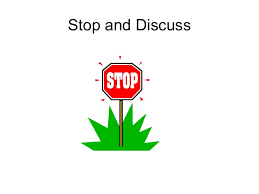



In [ ]:
from collections import OrderedDict

class GAN(pl.LightningModule):
  def __init__(self ):
    super().__init__()
    self.generator = 
    self.discriminator = 

  def forward(self,x):
    L = _
    ab_fake = _
    img_fake = torch.cat([_,_], dim=1).permute(0,2,3,1)
    return img_fake



  def training_step(self, train_batch, batch_idx, optimizer_idx):
    #TODO:  send your L image through the Generator 
    self.L, self.condition = train_batch['L'].float().clone(), train_batch['ab'].float()
    #TODO : define your loss
    criterion = GANLoss(device = self.device).to(self.device)
    criterionL1 = nn.L1Loss()
    if optimizer_idx == 1:
    #TODO: Train discriminator 

        #Question: When does this step occurs ?
        #TODO : Recreate the images and calculate the mean of Loss(es)
        recolored_image =
        fake_prediction = 

        real_image = 
        real_prediction =  
        #TODO : Calculate Loss(es)
        loss_fake = criterion(fake_prediction,real_or_not = False)
        loss_real = criterion(real_prediction, real_or_not = True)

        loss =(loss_real + loss_fake)/2
        return loss

    if optimizer_idx == 0 :
    #TODO : Train generator 
        #TODO : Generate Fake Color and create image
        self.fake_color = 
        recolored_image = 
        #TODO : Send to Discriminator for review
        fake_prediction = 
        #TODO : Calculate Loss(es)
        loss_true =                         #GAN LOSS : let's fight
        loss_l1 =                           #L1 LOSS : Distance between created and real
        return loss_true + loss_l1*100

  def validation_step(self, val_batch, batch_idx):
      #TODO : write validation step


  def test_step(self, val_batch, batch_idx):
      #TODO : write test step


  def configure_optimizers(self):
      #Questions : How many optimizers will you define ? Why ? Use Adam
      lr = 2e-4
      beta1=0.005 #What is it 
      beta2=0.999 #What is it ?
      optimizer_generator = _
      optimizer_discriminator = _
      return [optimizer_generator, optimizer_discriminator], []

# Let's Train

If you continue in Deep Learning and work with GANs, you will see that it is a pain in the ass to train. 
* What could be the optimal training scenario ? How would the losses behave ?
* What could be the other cases ? How would the losses behave ?

Draw a small image showing the different cases. ADD IT ON YOUR SLIDES.

Now let's try to train your model. The training will be quite long (At least 15 epochs to see some results). So you can either grab a Coffee (or Do your slides?)


FEEL FREE TO LOAD A TENSORBOARD.

In [ ]:
dm = CIFARDataModule(directory ='./path', batch_size =512)
model = GAN()
trainer = Trainer(gpus=-1, max_epochs=20)
trainer.fit(model, dm)

In [ ]:
trainer.test(model)

# Let's test the model 

Now that your model learned something. Let's test it on the test dataset. 
Did it work ? How would you evaluate your work ?
* If yes, show us some examples ? 
* If no, tell us explain **why your training was not good and what happened during your training**. Give us some axis of amelioration of your model. And if you have some time, try it.


In [ ]:
import skimage
from skimage import io
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
from skimage.color import rgb2lab, lab2rgb
import matplotlib.pyplot as plt

#TODO: Load your checkpoint into your model.
model = GAN().load_from_checkpoint(_)



for i, data in enumerate(test_loader):

  L, ab, img   = data['L'], data['ab'], data['image']
  predictions = model(L) #Send image to model, Depending on your forward you might need to concatenate things.
  prediction_rgb = lab2rgb()  #Convert to rgb
  # Plot some images/
  plt.imshow(prediction_rgb)
  plt.show()
  plt.imshow(img.squeeze(0).detach().cpu().numpy())
  print()


# Is the GAN really useful ?

Open question :               

* Do we really need a GAN to recolorize images ? 
* Can we do it with self supervised technics ? What could be the issues ?

# Wanna Do it on pokemons ?

* If you have a GPU and some videos of pokemons, you can try to recolore some episodes. 